In [327]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from random import shuffle
import math
import random
from sklearn.metrics import mean_squared_error
import sklearn
import seaborn
%matplotlib inline

## Challenge 1

In [328]:
np.random.seed(42)
nsample = 50
x1 = np.linspace(1.0, 20.0, nsample)
sig = .125
X = [np.log(x) for x in x1] # Create parameter
X = sm.add_constant(X)
X1 = sm.add_constant(x1)

beta = [5., 1.5] # Create parameter coefficients

In [329]:
y_true = np.dot(X,beta)
y = y_true + sig*np.random.normal(size=nsample) # Add epsilon

In [330]:
df = pd.DataFrame(x1,y)

In [331]:
df = df.reset_index()

In [332]:
df.columns = ['y','x1']

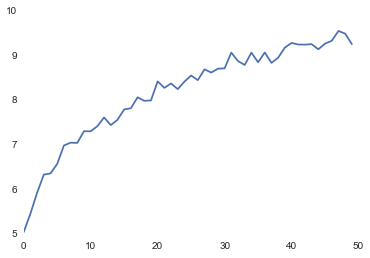

In [333]:
plt.plot(y)

In [334]:
# y ~ x1
# Relatively good fit but not perfect
fit_reg = sm.OLS(y, X1).fit()
print(fit_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     358.1
Date:                Tue, 14 Jul 2015   Prob (F-statistic):           6.74e-24
Time:                        17:36:22   Log-Likelihood:                -21.806
No. Observations:                  50   AIC:                             47.61
Df Residuals:                      48   BIC:                             51.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.2633      0.115     54.529      0.0

In [335]:
# y ~ log(x1)
# Fit log model, better results
fit_log = sm.OLS(y, X).fit()
print(fit_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4489.
Date:                Tue, 14 Jul 2015   Prob (F-statistic):           4.46e-49
Time:                        17:36:22   Log-Likelihood:                 38.531
No. Observations:                  50   AIC:                            -73.06
Df Residuals:                      48   BIC:                            -69.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.0541      0.049    102.321      0.0

In [336]:
yhat = fit_log.predict(X)

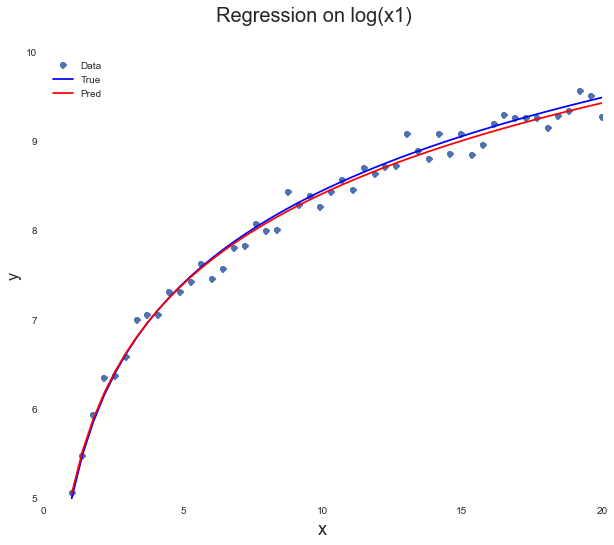

In [337]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(x1, yhat, 'b-', label="Pred", c='r')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
ax.legend(loc="best")
fig.suptitle('Regression on log(x1)',fontsize=20)

In [338]:
# y ~ x1^2
# Fit quadratic model
y_q,X_q = dmatrices('y ~ I(x1**2)', df) # Create matrices

In [339]:
fit_q = sm.OLS(y_q, X_q).fit()
print(fit_q.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 14 Jul 2015   Prob (F-statistic):           1.16e-14
Time:                        17:36:22   Log-Likelihood:                -43.856
No. Observations:                  50   AIC:                             91.71
Df Residuals:                      48   BIC:                             95.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.1031      0.129     54.915      0.0

In [340]:
yhat_q = fit_q.predict(X_q)

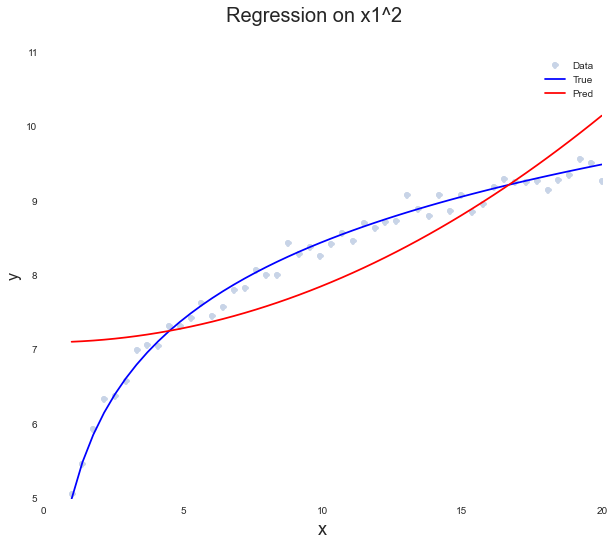

In [341]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x1, y, 'o', label="Data",alpha=0.5)
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(x1, yhat_q, 'b-', label="Pred", c='r')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
ax.legend(loc="best")
fig.suptitle('Regression on x1^2',fontsize=20)

## Challenge 2

In [342]:
np.random.seed(43)
nsample = 300
sig = 4
x1 = np.linspace(1.0, 10.0, nsample)
X = np.c_[x1,x1**2]
X = sm.add_constant(X)

beta = [20., 1.5, 3.0] # Create parameter coefficients

In [343]:
y_true = np.dot(X,beta)
y = y_true + sig*np.random.normal(size=nsample) # Add epsilon

In [344]:
df_2 = pd.DataFrame(x1,y)
df_2 = df_2.reset_index()

In [345]:
df_2.head()

,index,0
0,25.529600,1.000000
1,21.094545,1.030100
2,23.448365,1.060201
3,23.062058,1.090301
4,28.878793,1.120401


In [346]:
df_2.columns=['y','x1']

In [347]:
# Normal linear regression on x1
y2, X2 = dmatrices('y ~ x1 + I(x1**2)', df_2)

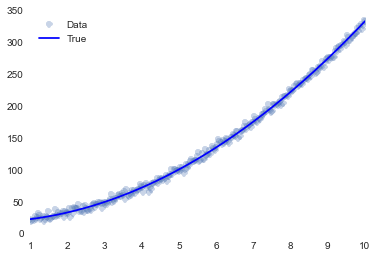

In [348]:
fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data",alpha=0.3)
ax.plot(x1, y_true, 'b-', label="True")
ax.legend(loc="best")

In [349]:
# Perfect fit, on itself
fit = sm.OLS(y2,X2).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.176e+04
Date:                Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                        17:36:24   Log-Likelihood:                -834.09
No. Observations:                 300   AIC:                             1674.
Df Residuals:                     297   BIC:                             1685.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.8060      1.021     19.396      0.0

In [350]:
split = int(round(len(df_2)/1.3))
print split
indices = np.random.permutation(df_2.shape[0]) # shuffle indices
training_idx, test_idx = indices[:split], indices[split:] 
df_tr = df_2.loc[training_idx] # partition data for training
df_ts = df_2.loc[test_idx] # partition data for testing

231


In [351]:
# Perform regression on test and training set
y_tr, X_tr = dmatrices('y ~ x1 + I(x1**2)', df_tr)
y_ts, X_ts = dmatrices('y ~ x1 + I(x1**2)', df_ts)

In [352]:
fit_2 = sm.OLS(y_tr, X_tr).fit()

In [353]:
y_ts_model = fit_2.predict(X_ts)
y_tr_model = fit_2.predict(X_tr)

In [354]:
# Sort data for prettier graphing
temp_ts = zip(*sorted(zip(X_ts[:,1],y_ts)))
temp_ts_model = zip(*sorted(zip(X_ts[:,1],y_ts_model)))

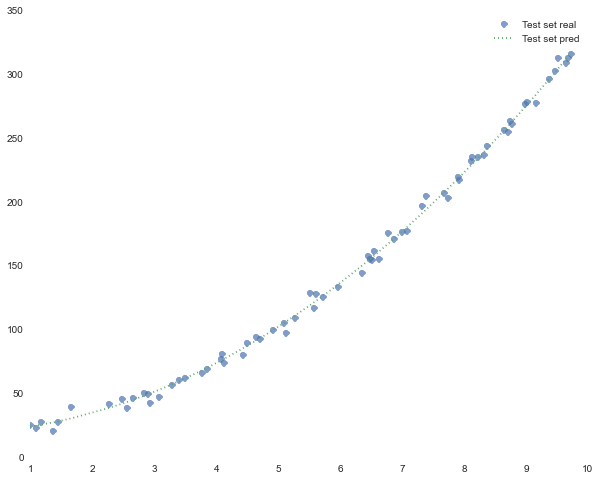

In [355]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temp_ts[0],temp_ts[1], 'o', label="Test set real",alpha=0.7)
ax.plot(temp_ts_model[0],temp_ts_model[1],linestyle=':', label="Test set pred")
ax.legend(loc="best")

In [403]:
print "Mean squared error on training set"
print sklearn.metrics.mean_squared_error(y_tr, y_tr_model)
print "Mean squared error on test set"
print sklearn.metrics.mean_squared_error(y_ts, y_ts_model)
print "Check the estimated mean squared error of the true data"
print sklearn.metrics.mean_squared_error(y_true, y)

Mean squared error on training set
14.5427572024
Mean squared error on test set
17.5138212617
Check the estimated mean squared error of the true data
15.282202996


## Challenge 3
####For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

In [357]:
df_2.head()

,y,x1
0,25.529600,1.000000
1,21.094545,1.030100
2,23.448365,1.060201
3,23.062058,1.090301
4,28.878793,1.120401


In [398]:
x = pd.DataFrame({'x1': np.linspace(x1.min(), x1.max(), 300)})

,x1
0,1.000000
1,1.030100
2,1.060201
3,1.090301
4,1.120401
5,1.150502
6,1.180602
7,1.210702
8,1.240803
9,1.270903


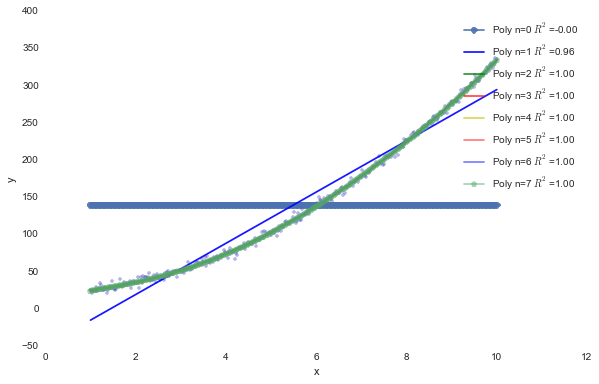

In [402]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df_2.x1, df_2.y, s=10, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')

# points linearlyd space on lstats
# x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})


# 0th order polynomial
poly_0 = smf.ols(formula='y ~ 1', data=df_2).fit()
plt.plot(x1, poly_0.predict(), 'o-', label='Poly n=0 $R^2$=%.2f' % poly_0.rsquared, 
        alpha=0.9)


# 1-st order polynomial
poly_1 = smf.ols(formula='y ~ 1 + x1', data=df_2).fit()
plt.plot(x1, poly_1.predict(), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)
#
# 2-nd order polynomial
poly_2 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0)', data=df_2).fit()
plt.plot(x1, poly_2.predict(), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
        alpha=0.8)

# 3-rd order polynomial
poly_3 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0) + I(x1 ** 3.0)', data=df_2).fit()
plt.plot(x1, poly_3.predict(), 'r-', alpha=0.7,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

# 4-th order polynomial
poly_4 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0) + I(x1 ** 3.0) + I(x1 ** 4.0)', data=df_2).fit()
plt.plot(x1, poly_4.predict(), 'y-', alpha=0.6,
         label='Poly n=4 $R^2$=%.2f' % poly_4.rsquared)

# 5-th order polynomial
poly_5 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0) + I(x1 ** 3.0) + I(x1 ** 4.0) + I(x1 ** 5.0)', data=df_2).fit()
plt.plot(x1, poly_5.predict(), 'r-', alpha=0.5,
         label='Poly n=5 $R^2$=%.2f' % poly_5.rsquared)

# 6-th order polynomial
poly_6 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0) + I(x1 ** 3.0) + I(x1 ** 4.0) + I(x1 ** 5.0) + I(x1 ** 6.0)', data=df_2).fit()
plt.plot(x1, poly_6.predict(), 'b-', alpha=0.5,
         label='Poly n=6 $R^2$=%.2f' % poly_6.rsquared)

# 7-th order polynomial
poly_7 = smf.ols(formula='y ~ 1 + x1 + I(x1 ** 2.0) + I(x1 ** 3.0) + I(x1 ** 4.0) + I(x1 ** 5.0) + I(x1 ** 6.0) + I(x1 ** 7.0)', data=df_2).fit()
plt.plot(x1, poly_5.predict(), 'p-', alpha=0.5,
         label='Poly n=7 $R^2$=%.2f' % poly_7.rsquared)

plt.legend()

In [396]:
np.random.seed(43)
nsample = 300
sig = 4
x1 = np.linspace(1.0, 10.0, nsample)
X = np.c_[x1,x1**2]
X = sm.add_constant(X)
y_true = np.dot(X,beta)
y = y_true + sig*np.random.normal(size=nsample) # Add epsilon

In [381]:
# Polynomial fit 0th order
y_0, X_0 = dmatrices('y ~ 1', df_2)
fit_0 = sm.OLS(y_0, X_0).fit()
X_data = 

In [382]:
# Polynomial fit 1st order
y_1, X_1 = dmatrices('y ~ x1', df_2)
fit_1 = sm.OLS(y_1, X_1).fit()

In [383]:
# Polynomial fit 2nd order
y_2, X_2 = dmatrices('y ~ x1 + I(x1**2)', df_2)
fit_2 = sm.OLS(y_2, X_2).fit()

In [384]:
# Polynomial fit 3rd order
y_3, X_3 = dmatrices('y ~ x1 + I(x1**2) + I(x1**3)', df_2)
fit_3 = sm.OLS(y_3, X_3).fit()